<a href="https://colab.research.google.com/github/chanhee922/DeepLearning_Practice/blob/master/%EB%8B%A8%EC%B8%B5_%EC%8B%A0%EA%B2%BD%EB%A7%9D%EC%9D%84_%EC%A7%81%EC%A0%91_%EC%BD%94%EB%94%A9%ED%95%98%EC%97%AC_%EC%9D%B4%ED%95%B4%ED%95%B4%EB%B3%B4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- 학습률(learning rate) = 가중치 변화율(w_grad) * 학습률(lr)  
        목적: 가중치의 변화량(업데이트 속도)을 더 크게(빠르게) 함  
        효과: 더 빠르게 손실 함수의 오차값을 줄여나가서 결국 전역 최소값을 더 빠르게 찾아갈 수 있도록 도와주는 역할  
        부작용: 학습율이 너무 높으면 너무 크게 가중치가 커지고  
        반대로 손실함수의 오차값이 너무 빠르게 감소하다가 손실함수의 전역 최소값을 뛰어넘게(오차값이 커진다) 됨.  
        결국 분석가가 적절한 값을 찾아야 할 하이퍼파라미터임(모델튜닝)

In [0]:
import numpy as np

In [0]:
class SingleLayer:
    
    def __init__(self, learning_rate = .1):     # 학습율(에타) 하이퍼 파라미터 추가
        self.w = None
        self.b = None
        
        # 손실함수의 평균오차값을 매 훈련시마다(epoch) 저장
        self.losses = []  
        self.w_history = []         # 매 훈련시 마다 학습으로 변하는 가중치의 변화를 저장
        self.lr = learning_rate     # 학습율 저장
        pass # constructor
    
    
    # 정방향계산(=뉴런의 선형함수 계산)
    def forpass(self, x):
        # z = w1x1 + w2x2 + ..... wnxn + b
        z = np.sum(x * self.w) + self.b
        return z
        
        pass # forpass
    
    
    # 역방향계산(오차역전파와 손실함수의 미분을 통한 가중치와 절편의 변화율 계산)
    def backprop(self, x, err):
        w_grad = x * err    # 가중치(w)에 대한 변화율(=gradient) 계산
        b_grad = 1 * err    # 절편(b)에 대한 변화율(=gradient) 계산
        
        return w_grad, b_grad
        pass # backprop
    
    
    # 활성화함수(시그모이드) 통과하여 반환
    def activation(self, z):
        # **** 안전한 지수(또는 로그) 계산을 위해, 지정됨 범위 값을 가지도록 함
#       z = np.clip(z, 1e-10, 1 - 1e-10)   # 1st. method
        z = np.clip(z, -100, None)         # 2nd. method
    
        a = 1 / (1 + np.exp(-z))
        return a
        pass # activation
    
    
    # 신경망 훈련을 통한 최적의 가중치(w)와 절편(b)을
    # 찾아가도록 훈련
    def fit(self, x, y, epochs=100):        
        # (1). 가중치와 절편의 초기값 설정
        self.w = np.ones(x.shape[1])  # 1-D, vector with all elements is 1
        self.b = 0
        
        # (2)  epoch 돌립니다.
        for i in range(epochs):
            
            # (3) 전체샘플을 활용한 학습(가중치와 절편을 업데이트) 수행
            #
            # 신경망을 훈련시킬 훈련 데이터 셋은, 있는 그대로 밀어넣는게 아니라,
            # 매 에포크(epoch) 마다, shuffling해서, 밀어 넣어야 함!!!
            # 전체 sample 을 무작위로 섞는 shuffling 함수 ==> np.random.permutation()함수
            
            indexes = np.arange( len(x) )  # 전체 샘플의 index 번호를 1-D, Vector로 생성
            indexes = np.random.permutation( indexes ) # shuffling 후 다시 저장
            
            # 매 epoch 마다 평균 손실함수의 오차값 산출하여, 리스트에 저장
            loss = 0
            
            for i in indexes:
#             for xi, yi in zip(x, y):
                xi = x[i]   # 매번 샘플의 입력데이타
                yi = y[i]   # 맨번 샘플의 정답데이타
        
                # (4) 정방향계산 수행
                z = self.forpass(xi)
                
                # (5) 활성화함수 통과
                a = self.activation(z)
                
                # (6) 오차계산
                err = -(yi - a)
                
                # (7) 오차역전파를 통한, 가중치와 절편의 변화율 계산
                w_grad, b_grad = self.backprop(xi, err)
                
                # (8) 계산된 가중치와 절편의 변화율을 이용한 , 가중치/절편의 업데이트
                self.w -= w_grad
                self.b -= b_grad
                
                # 매번 업데이트되는 가중치를 파이썬 리스트에 추가
                
                self.w_history.append(self.w.copy()) # Deep copy

                # (9) 로지스틱 손실함수의 계산 수행
                # 안전한 로그계산을 위한 클리핑 수행
                a = np.clip(a, 1e-10, 1 - 1e-10) # 1st.method
#                 a = np.clip(a, -100, None)       # 2st.method

                L = -( yi * np.log(a) + (1 - yi) * np.log(1-a)   )
                loss += L
                
                pass # traninig loop (1 epoch)
            
            # 로지스틱손실함수의 평균값 계산
            self.losses.append( loss / len(y)  )
                        
            pass # epoch loop
        
        pass # fit
    
    
    # 분류예측함수
    def predict(self, x):
        # 정방향계산 수행
        z = [  self.forpass(xi) for xi in x   ]
        
        # 간결성과 가독성을 위해서는, 죽~아래코드를 그대로 활용
        # if z > 0, sigmoid(z) > 0.5
        # if z < 0, sigmoid(z) < 0.5
#         return np.array(z) > 0 # 1-D, Vector
        
        # 활성화함수 통과
        # np.array(z) : python list -> ndarray (1-D, Vector) 변환
        a = self.activation(np.array(z))  
        
        # 임계함수로 step function 통과시켜, 최종 분류예측값 산출
        return a > .5
        pass # predict
    
    # 모델의 성능(정확도)평가 함수
    def score(self, x, y):
        return np.mean(self.predict(x) == y)
        pass # score
            
    pass # end class

In [0]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

x = cancer.data
y = cancer.target

from sklearn.model_selection import train_test_split
x_train_all, x_test_all, y_train_all, y_test_all = train_test_split(x, y, stratify = y, test_size=.2)
# x_train_all.shape, x_test_all.shape, y_train_all.shape, y_test_all.shape

x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, test_size = .2, stratify = y_train_all)
# print( x_train.shape, x_val.shape, y_train.shape, y_val.shape )

In [0]:
simpleNN = SingleLayer(learning_rate= .1)
simpleNN

In [0]:
# 1) 훈련 데이터 셋으로 모델 학습 수행
simpleNN.fit(x_train, y_train)

# 2) 검증 데이터 셋으로 모델 튜닝() -> 모델 성능평가
simpleNN.score(x_val, y_val)

0.9560439560439561

In [0]:
len(simpleNN.w_history)

36400

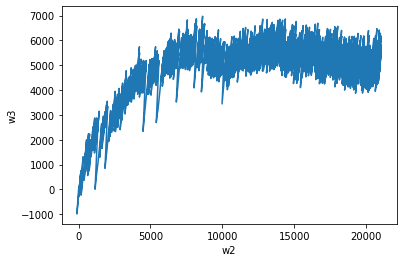

In [0]:
import matplotlib.pyplot as plt

w2 = []
w3 = []

for w in simpleNN.w_history:
    w2.append( w[2] ) # mean perimeter
    w3.append( w[3] ) # mean area
    pass # loop end

plt.plot(w2, w3)
plt.xlabel('w2')
plt.ylabel('w3')

plt.show()

# 스케일(변량)이 큰 특성변수에 대하여 표준화를 수행하지 않은 채로
# 모델을 학습시키면, 이 특성에 대한 가중치의 수렴 과정은 아래 그림과 같이
# 매우 불안정함

In [0]:
#   전체 입력 데이터 셋을 표준화    - 2nd. method (직접구현)
#       scikit-learn package의 StandardScaler 클래스 활용
x_train.shape # (364, 30)

# 표준화 전처리 수행
# 1) 평균산출 -> 2) 표준편차 산출 -> 3) 공식에 따라 표준화 수행

x_train_mean = np.mean(x_train, axis = 0) # 평균 (0 = 열방향)
x_train_std = np.std(x_train, axis = 0)   # 표준편차

x_train_scaled = ( x_train - x_train_mean ) / x_train_std
print(x_train_scaled.shape)

(364, 30)


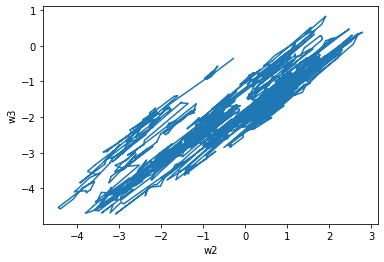

In [0]:
# 1) 훈련 데이터 셋으로 모델 학습 수행
simpleNN = SingleLayer()
simpleNN.fit(x_train_scaled, y_train)

import matplotlib.pyplot as plt

w2 = []
w3 = []

for w in simpleNN.w_history:
    w2.append( w[2] ) # mean perimeter
    w3.append( w[3] ) # mean area
    pass # loop end

plt.plot(w2, w3)
plt.xlabel('w2')
plt.ylabel('w3')

plt.show()

In [0]:
# 표준화되지 않은 검증데이터셋으로 정확도
simpleNN.score(x_val, y_val)


0.37362637362637363

In [0]:
# 검증셋의 표준화 전처리
x_val_mean = np.mean(x_val, axis  = 0)
x_val_std = np.std(x_val, axis  = 0)

x_val_scaled = ( x_val - x_val_mean ) / x_val_std

In [0]:
simpleNN.score(x_val_scaled, y_val)

0.9230769230769231

### 주의점
훈련, 검증, 테스트 데이터셋을 표준화 시킬때, 함정이 있다  

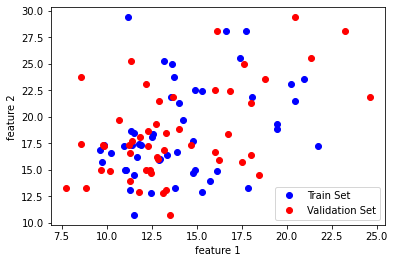

In [0]:
# 원본 훈련셋과 검증셋으로 산점도 그리기
plt.plot( x_train[:50, 0], x_train[:50,1], 'bo' ) # 훈련셋에대한 산점도
plt.plot( x_val[:50, 0], x_train[:50,1], 'ro' )
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend([ 'Train Set', 'Validation Set' ])
plt.show()

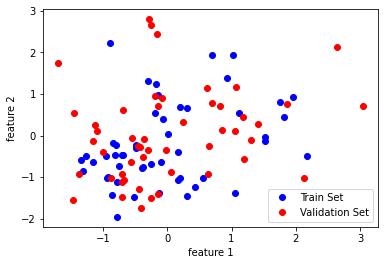

In [0]:
# 원본 훈련셋과 검증셋으로 산점도 그리기
plt.plot( x_train_scaled[:50, 0], x_train_scaled[:50,1], 'bo' ) # 훈련셋에대한 산점도
plt.plot( x_val_scaled[:50, 0], x_val_scaled[:50,1], 'ro' )
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend([ 'Train Set', 'Validation Set' ])
plt.show()

여러셋으로 나누어진 각각의 셋을 표준화 시킬때에는 훈련셋의 통계량을 기준으로 나머지 검증/테스트 셋도 표준화 시켜야함